## Introduction to Machine Learning  

## Assignment 2: Decision Trees

You can't learn technical subjects without hands-on practice. The assignments are an important part of the course. To submit this assignment you will need to make sure that you save your Jupyter notebook. 

Below are the links of 2 videos that explain:

1. [How to save your Jupyter notebook](https://youtu.be/0aoLgBoAUSA) and,       
2. [How to answer a question in a Jupyter notebook assignment](https://youtu.be/7j0WKhI3W4s).

### Assignment Learning Goals:

By the end of the module, students are expected to:

- Broadly describe how decision trees make predictions.
- Use `DecisionTreeClassifier()` and `DecisionTreeRegressor()` to build decision trees using scikit-learn.
- Use the `.fit()` and `.predict()` paradigm and use `.score()` method of ML models.
- Explain the concept of decision boundaries.
- Build a decision tree classifier on a real-world dataset and explore different hyperparameters of the classifier.
- Explain how decision boundaries change with `max_depth`.
- Build a decision tree regressor.

This assignment covers [Module 2](https://ml-learn.mds.ubc.ca/en/module2) of the online course. You should complete this module before attempting this assignment.

Any place you see `...`, you must fill in the function, variable, or data to complete the code. Substitute the `None` with your completed code and answers then proceed to run the cell!

Note that some of the questions in this assignment will have hidden tests. This means that no feedback will be given as to the correctness of your solution. It will be left up to you to decide if your answer is sufficiently correct. These questions are worth 2 points.

In [1]:
# Import libraries needed for this lab
from hashlib import sha1

import altair as alt
import graphviz
import numpy as np
import pandas as pd

from IPython.display import HTML
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier
import test_assignment2 as t

from display_tree import display_tree
alt.renderers.enable('html')

RendererRegistry.enable('html')

## 1. Decision Tree Structure 

**Question 1.1** <br> {points: 5}  

<img src='static/tree.png' width="70%"/>

Label the 4 components of the decision tree diagram each with one of the possible values: 

- Stump

- Root

- Branch

- Trunk

- Node 

- Leaf

- Bark

- Nodule

*Answer in the cell below by assigning the name of the decision tree as a string to the objects named `label_1`, `label_2`, `label_3` and `label_4`.*

In [2]:
label_1 = "Root"
label_2 = "Branch"
label_3 = "Leaf"
label_4 = "Node"

In [3]:
t.test_1_1_1(label_1)

'Success'

In [4]:
t.test_1_1_2(label_2)

'Success'

In [5]:
# check that the variable exists
assert 'label_3' in globals(
), "Please make sure that your solution is named 'label_3'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

In [6]:
t.test_1_1_4(label_4)

'Success'

**Question 1.2** <br> {points: 1}  


<img src='static/pman_tree.png' width="130%"/>

What would this decision tree predict for an observation with the following features?

<br>

```
   attack  defense  sp_attack  sp_defense  speed  capture_rt  gen
0    33      101        52         23        74      12        5
```
<br>

*Save you answer as a string in an object named `pokemon_prediction`.*

In [7]:
pokemon_prediction = "Reg"

In [8]:
t.test_1_2(pokemon_prediction)

'Success'

**Question 1.3** <br> {points: 1}  

What is the depth of the decision tree in **Question 1.2**?



*Answer in the cell below with  your answer and assign it to an object called `tree_depth`.*

In [9]:
tree_depth = 4

In [10]:
t.test_1_3(tree_depth)

'Success'

## 2. Decision Tree Building

Suppose you have three different job offers with comparable salaries and job descriptions. You want to decide which one to accept, and you want to make this decision based on which job is likely to make you happy. Being a very systematic person, you come up with three features associated with the offers, which are important for your happiness: whether the colleagues are supportive, work-hour flexibility, and whether the company is a start-up or not. 

In [11]:
offer_data = {
    # Features
    "supportive_colleagues": [1, 0, 0],
    "work_hour_flexibility": [0, 0, 1],
    "start_up": [0, 1, 1],
    # Target
    "target": ["?", "?", "?"],
}

offer_df = pd.DataFrame(offer_data)
offer_df

,supportive_colleagues,work_hour_flexibility,start_up,target
0,1,0,0,?
1,0,0,1,?
2,0,1,1,?


Next, you ask the following questions to some of your friends (who you think have similar notions of happiness) regarding their jobs:

1. Do you have supportive colleagues? (1 for 'yes' and 0 for 'no')
2. Do you have flexible work hours? (1 for 'yes' and 0 for 'no')
3. Do you work for a start-up? (1 for 'start up' and 0 for 'non start up')
4. Are you happy in your job? (happy or unhappy)

You get the following data from this toy survey. Your goal is to train a machine learning model using this toy data and then use this model to predict which job is likely to make you happy. 

In [12]:
import pandas as pd

happiness_data = {
    # Features
    "supportive_colleagues": [1, 1, 1, 0, 0, 1, 1, 0, 1, 0],
    "work_hour_flexibility": [1, 1, 0, 1, 1, 0, 1, 0, 0, 0],
    "start_up": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
    # Target
    "target": [
        "happy",
        "happy",
        "happy",
        "unhappy",
        "unhappy",
        "happy",
        "happy",
        "unhappy",
        "unhappy",
        "unhappy",
    ],
}

train_df = pd.DataFrame(happiness_data)
train_df

,supportive_colleagues,work_hour_flexibility,start_up,target
0,1,1,1,happy
1,1,1,0,happy
2,1,0,1,happy
3,0,1,0,unhappy
4,0,1,1,unhappy
5,1,0,0,happy
6,1,1,0,happy
7,0,0,1,unhappy
8,1,0,1,unhappy
9,0,0,0,unhappy


**Question 2.1** <br> {points: 2}  

With this toy dataset, build a decision stump (decision tree with only 1 split) by hand by splitting on the condition `supportive_colleagues` == 1. 

What training accuracy would you get with this decision stump?

Save the accuracy as a fraction in an object named `supportive_colleagues_acc`. 

In [13]:
supportive_colleagues_acc = 0.9
supportive_colleagues_acc

0.9

In [14]:
# check that the variable exists
assert 'supportive_colleagues_acc' in globals(
), "Please make sure that your solution is named 'supportive_colleagues_acc'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

**Question 2.2** 
<br> {points: 1}

The idea of a machine learning algorithm is to *fit* the best model on the given training data, which is in the form of feature vectors (`X`) and their corresponding targets(`y`),  and then using this model to *predict* targets for new examples (represented with feature vectors).

From `train_df`, create the feature table and save it in an object named `X` and the target in an object named `y`. 

In [15]:
X = train_df.drop(columns=["target"])
y = train_df["target"]

In [16]:
t.test_2_2(X,y)

'Success'

**Question 2.3** 
<br> {points: 1}

Build a decision tree named `toy_tree` and fit it on the toy data using `sklearn`'s [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).


In [17]:
toy_tree =  DecisionTreeClassifier()
toy_tree.fit(X,y)

DecisionTreeClassifier()

In [18]:
t.test_2_3(toy_tree)

'Success'

**Question 2.4** <br> {points: 1}

Visualize the trained decision tree using the function `display_tree` that we have imported from the `display_tree` library already. 
Save it in an object named `toy_displayed`.

*Hint: use `?display_tree` to get more information about the function.*

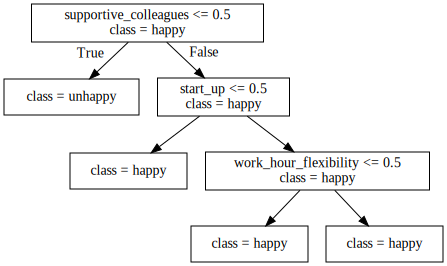

In [19]:
toy_displayed = display_tree(["supportive_colleagues", "work_hour_flexibility", "start_up"], toy_tree)
toy_displayed

In [20]:
t.test_2_4(toy_displayed)

'Success'

**Question 2.5** <br> {points: 1}

Score the decision tree on the training data (`X` and `y`).
Save the results in an object named `toy_score`. 

In [21]:
toy_score = toy_tree.score(X,y)
toy_score 

0.9

In [22]:
t.test_2_5(toy_score)

'Success'

**Question 2.6** <br> {points: 1}

Predict on `X`. Add the results as a column named `predicted` in the `train_df` and name this new dataframe `predicted_train`. 

In [23]:
predicted = toy_tree.predict(X)

predicted_train = pd.concat([train_df, pd.Series(predicted, name='predicted')], axis=1)
predicted_train

,supportive_colleagues,work_hour_flexibility,start_up,target,predicted
0,1,1,1,happy,happy
1,1,1,0,happy,happy
2,1,0,1,happy,happy
3,0,1,0,unhappy,unhappy
4,0,1,1,unhappy,unhappy
5,1,0,0,happy,happy
6,1,1,0,happy,happy
7,0,0,1,unhappy,unhappy
8,1,0,1,unhappy,happy
9,0,0,0,unhappy,unhappy


In [24]:
t.test_2_6(predicted_train)

'Success'

**Question 2.7** <br> {points: 1}

Do you get perfect training accuracy? 


A) Yes, the model correctly predicts every single observation

B) No, the model made a mistake likely because the decision tree wasn't complex enough.

C) No, there are two examples in the dataset with exactly the same feature values but different targets so the model makes a mistake on one of them. 

D No, the model is randomly predicting and therefore it won't get every single example correct. 

*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between `""`, assign the correct answer to an object called `answer2_7`.*

In [25]:
answer2_7 = "C"

In [26]:
t.test_2_7(answer2_7)

'Success'

**Question 2.8** <br> {points: 1}

Create a feature table from the `offer_df` (We don't know the target value in this case). 

*Save this in an object named `offer_X`*.

In [27]:
offer_X = offer_df.drop(columns=["target"])

In [28]:
t.test_2_8(offer_X)

'Success'

**Question 2.9** <br> {points: 1}

Use the model `toy_tree` to predict which jobs from the `offer_df`, you will be happy working.  In other words, `predict` on `offer_X`.

Add a column to the `offer_df` dataframe named `predicted` and save the whole dataframe in an object named `pred_offer_df`.

In [29]:
pred_offer_df = None

predicted = toy_tree.predict(offer_X)

pred_offer_df = pd.concat([offer_df, pd.Series(predicted, name='predicted')], axis=1)
pred_offer_df

,supportive_colleagues,work_hour_flexibility,start_up,target,predicted
0,1,0,0,?,happy
1,0,0,1,?,unhappy
2,0,1,1,?,unhappy


In [30]:
t.test_2_9(pred_offer_df)

'Success'

# 3. Exploratory Data Analysis and Decision Trees 

For the rest of the lab you'll be using a modified version of Kaggle's [Pokemon](https://www.kaggle.com/mlomuscio/pokemon?select=PokemonData.csv) dataset.
The dataset contains a number of features of pokemon's strength and weaknesses:

- `num`: ID for each Pokémon.
- `name`: Name of each Pokémon.
- `type`: Each Pokémon has a type, this determines weakness/resistance to attacks.
- `hp`: Hit points, or health, defines how much damage a Pokémon can withstand before fainting.
- `attack`: The base modifier for normal attacks (eg. Scratch, Punch).
- `defense`: The base damage resistance against normal attacks.
- `sp_atk`: Special attack, the base modifier for special attacks (e.g. fire blast, bubble beam).
- `sp_def`: The base damage resistance against special attacks.
- `total`: Sum of the `attack`, `defense`, `sp_atk`, and `sp_def` columns
- `speed`: Determines which Pokémon attacks first each round.
- `generation`: Number of generation.
- `legendary`: 1 if Legendary Pokémon, 0 if not.

In this question, our target is the `lengendary` column.

In [31]:
pokemon = pd.read_csv('data/pokemon.csv')
pokemon.head()

,num,name,hp,attack,defense,sp_atk,sp_def,speed,total,generation,legendary,type
0,1,Bulbasaur,45,49,49,65,65,45,228,1,0,Grass
1,2,Ivysaur,60,62,63,80,80,60,285,1,0,Grass
2,3,Venusaur,80,82,83,100,100,80,365,1,0,Grass
3,3,VenusaurMega Venusaur,80,100,123,122,120,80,465,1,0,Grass
4,4,Charmander,39,52,43,60,50,65,205,1,0,Fire


**Question 3.1** <br> {points: 1}

Show information of each feature using `pd.DataFrame.info` on `pokemon` and answer the question below.

Select all that apply? 


A) There are `13` columns in the dataset.

B) The legendary column is of Dtype `int64`.

C) `5` columns have null values. 

D The name column is of Dtype `string`.

*Answer in the cell below using the uppercase letter associated with your answer. Place your answer(s) between `""` in a list, assign the correct answer to an object called `answer3_1`. For example ["A', "B"] is a possible answer*

In [32]:
answer3_1 = ["B", "D"]

In [33]:
t.test_3_1(answer3_1)

'Success'

**Question 3.2** <br> {points: 1}

Show summary statistics of each feature using `pd.DataFrame.describe` on `pokemon` and store it into a variable called `pokemon_summary`. 

In [34]:
pokemon_summary = pokemon.describe()

In [35]:
t.test_3_2(pokemon_summary)

'Success'

**Question 3.3** <br> {points: 1}

Using the Altair skills that you learned in [**Programming in Python for Data Science**](https://prog-learn.mds.ubc.ca/en/), Take the code below that we started for you (between the `'''`) and copy it into the solution cell. Fill in the blank areas (`....`) so that the code produces histograms for the following features (in order) that show the distribution of the feature values, separated for 0 and 1 target values. 

- `hp`
- `attack`
- `defense`
- `sp_atk`
- `sp_def`
- `speed`
- `total`


```
def plot_histogram(df,feature):
    """
    plots a histogram of a decision trees feature
     
    Parameters
    ----------
    feature: str
        the feature name
    Returns
    -------
    altair.vegalite.v3.api.Chart
        an Altair histogram 
    """
    histogram = alt.Chart(df).mark_bar(
        opacity=0.7).encode(
        alt.X(feature, bin=alt.Bin(maxbins=50)),
        alt.Y('count()', stack=None),
        alt.Color(....)).properties(
        title= str.title(feature))
    return ....

feature_list = ....
figure_dict = dict()
for feature in .... :
    figure_dict.update({feature:plot_histogram(....,feature)})
figure_panel = alt.vconcat(*figure_dict.values())
figure_panel
```

In [36]:
def plot_histogram(df,feature):
    """
    plots a histogram of a decision trees feature
     
    Parameters
    ----------
    feature: str
        the feature name
    Returns
    -------
    altair.vegalite.v3.api.Chart
        an Altair histogram 
    """
    histogram = alt.Chart(df).mark_bar(
        opacity=0.7).encode(
        alt.X(feature, bin=alt.Bin(maxbins=50)),
        alt.Y('count()', stack=None),
        alt.Color("legendary")).properties(
        title= str.title(feature))
    return histogram

feature_list = ["hp", "attack", "defense", "sp_atk", "sp_def", "speed", "total"]
figure_dict = dict()
for feature in feature_list :
    figure_dict.update({feature:plot_histogram(pokemon,feature)})
figure_panel = alt.vconcat(*figure_dict.values())
figure_panel


alt.VConcatChart(...)

In [37]:
t.test_3_3(plot_histogram,figure_panel,figure_dict)

'Success'

**Question 3.4** 
<br> {points: 2}

Which feature appears to be the most useful in differentiating the target classes?


*Answer in the cell below by putting the feature name between `""` and assign it to an object called `answer3_4`.*

In [38]:
answer3_4 = "total"
answer3_4

'total'

In [39]:
# check that the variable exists
assert 'answer3_4' in globals(
), "Please make sure that your solution is named 'answer3_4'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

**Question 3.5** 
<br> {points: 1}

Suppose for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?

A) If the histograms are identical then there is no way differentiate each target value and so the feature is not useful. 

B) If the histograms are identical then we only need to use that feature for predicting the target value.

C) If the histograms are identical, the feature might still be useful because it may be predictive in conjunction with other features.

D) If the histograms are identical, the feature might still be useful but only with other models.  


*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between `""`, assign the correct answer to an object called `answer3_5`.*


In [40]:
answer3_5 = "C"

In [41]:
t.test_3_5(answer3_5)

'Success'

**Question 3.6** 
<br> {points: 1}

Note that the dataset includes a categorical features labeled `type`. Do you think this feature could be useful in predicting whether the pokemon was legendary or not and would there be any difficulty in using it in our decision tree?

A) Yes, it would be useful but adding categorical features into a model needs special attention.

B) Yes, it would be useful and we shouldn't have any difficulty adding them into our model. 

C) No, We have enough features to predict with, the added `type` column would not add anything significant.

D) No, and categorical features would need special attention to add to our model.


*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between `""`, assign the correct answer to an object called `answer3_6`.*


In [42]:
answer3_6 = "A"

In [43]:
t.test_3_6(answer3_6)

'Success'

# 4. Hyperparameters

**Question 4.1** 
<br> {points: 1}

Create your $X$ and $y$ objects so that you X dataframe contains the columns: 
- `hp`
- `attack`
- `defense`
- `sp_atk`
- `sp_def`
- `speed`
- `total`
- `generation`

and your $y$ dataframe is the `legendary` column.

*Save each in the respective object names `X` and `y`* 

In [44]:
X = pokemon.loc[:, "hp" : "generation"]
y = pokemon["legendary"]

In [45]:
t.test_4_1(X,y)

'Success'

**Question 4.2** 
<br> {points: 3}

In this exercise, you'll explore the `max_depth` hyperparameter within the range 1 to 15. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

To do so, you will need to make a for loop for each value between 1-15 that: 
- Creates a model named `pokemon_tree`.
- Sets the `max_depth` hyperparameter to the value it's iterating on. 
- Sets the argument `random_state=8`. 
- Fits each model on X and y.
- Appends the model's score to the list depth_accuracy..



In [46]:
depth_accuracy = list()
max_depths = list(range(1,16))

for x in max_depths:
    pokemon_tree = DecisionTreeClassifier(max_depth=x, random_state=8)
    pokemon_tree.fit(X,y)
    depth_accuracy.append(pokemon_tree.score(X,y))   
    
depth_accuracy

[0.91875,
 0.95,
 0.95,
 0.96125,
 0.98,
 0.98875,
 0.99125,
 0.995,
 0.995,
 0.995,
 0.99625,
 0.9975,
 0.99875,
 0.99875,
 0.99875]

In [47]:
t.test_4_2(depth_accuracy)

'Success'

**Question 4.3** <br>
{points: 3} <br> 

Make a dataframe that contains the tree depth and scores and name it `depth_scores_df`

It should look something like this:

|    | max_depth      |   accuracy |
|---:|:--------------|-----------:|
|  0 | 1    |       # |
|  1 | 2 |       # |
|  2 | 3       |       # |
| ...| ...|...|
| 14 |15|#|


In [48]:
depth_scores_df = None 
max_depth = list(range(1,16))

depth_score_dict = { "max_depth" : max_depth,
                     "accuracy" : depth_accuracy}

depth_scores_df = pd.DataFrame(depth_score_dict)
depth_scores_df

,max_depth,accuracy
0,1,0.91875
1,2,0.95000
2,3,0.95000
3,4,0.96125
4,5,0.98000
5,6,0.98875
6,7,0.99125
7,8,0.99500
8,9,0.99500
9,10,0.99500


In [49]:
t.test_4_3(depth_scores_df)

'Success'

**Question 4.4** <br>
 {points: 1} <br>
 
Using altair, make a `mark_line()` plot which displays the depth of the decision tree on the *x*-axis and the `depth_accuracy` on the *y*-axis.
Make sure it has the dimensions `width=500, height=300`. Don't forget to give it a title and the plot `depth_acc_plot`


In [50]:
depth_acc_plot = alt.Chart(depth_scores_df, width=500, height=300).mark_line().encode(
                x=alt.X("max_depth:N"),
                y=alt.Y("accuracy:Q")).properties(title="depth_acc_plot")

depth_acc_plot

alt.Chart(...)

In [51]:
t.test_4_4(depth_acc_plot)

'Success'

# 5 Decision Tree Regressor

Let's use the real estate data set that we saw in Assignment 1 and see if we can improve our $R^2$ from last time. 

For this question we are using a dataset obtained from [The UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set) that contains the market historical data of real estate valuation collected from Sindian District, New Taipei City in Taiwan.

The columns in the dataset can be explained as follows: 

- `date`: the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- `house_age`: the house age (unit: year)
- `distance_station`: the distance to the nearest Mass Rapid Transit (MRT) station (unit: meter)
- `num_stores`: the number of convenience stores in the living circle on foot (integer)(a ***living circle*** is a residential space with similar local characteristics, and daily behaviors)
- `latitude`: the geographic coordinate, latitude. (unit: degree)
- `longitude`: the geographic coordinate, longitude. (unit: degree)
- `price`: house price per unit area (10000 New Taiwan Dollar/Ping,where Ping is a local unit of area, 1 Ping = 3.3 meter squared)


In [52]:
housing_df = pd.read_csv('data/real_estate.csv')
housing_df.head()

,house_age,distance_station,num_stores,latitude,longitude,price
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


**Question 5.1** 
<br> {points: 1}

Create your $X$ and $y$ objects.   
For the `X` dataframe make sure that you are not including `price`. Since our `y` (target) is the `price` column.        

*Save each in the respective object names `X` and `y`* 

In [53]:
X = housing_df.drop(columns=["price"])
y = housing_df["price"]

In [54]:
t.test_5_1(X,y)

'Success'

**Question 5.2** 
<br> {points: 1}

Build a Decision tree Regressor named `tree_reg`. Make sure to import DecisionTreeRegressor from  the sklearn.tree library. 
Train it on the variables `X` and `y` that we made in question 5.1. Save the score in a variable named `tree_score`. 

In [55]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X,y)
tree_score = tree_reg.score(X,y)
tree_score

0.9893300488110535

In [56]:
t.test_5_2(tree_score)

'Success'

**Question 5.3** 
<br> {points: 2}

Does the model do better than the Dummy Regressor we used in assignment 1? 

A) Both models Dummy Regressor and Decision Tree Regressor do about the same.

B) Dummy Regressor does moderately better.

C) Decision Tree Regressor does moderately better.

D) Dummy Regressor does much better than the Decision Tree Regressor.

E) Decision Tree Regressor does much better than the Dummy Regressor.



*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between `""`, assign the correct answer to an object called `answer5_3`.*


In [59]:
answer5_3 = "E"
answer5_3

'E'

In [58]:
# check that the variable exists
assert 'answer5_3' in globals(
), "Please make sure that your solution is named 'answer5_3'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

## Before Submitting 

Before submitting your assignment please do the following:

- Read through your solutions
- **Restart your kernel and clear output and rerun your cells from top to bottom** 
- Makes sure that none of your code is broken 
- Verify that the tests from the questions you answered have obtained the output "Success"

This is a simple way to make sure that you are submitting all the variables needed to mark the assignment. This method should help avoid losing marks due to changes in your environment.  

## Attributions
- Fertitily Diagnosis Dataset: - [The UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Fertility)

*David Gil, Jose Luis Girela, Joaquin De Juan, M. Jose Gomez-Torres, and
Magnus Johnsson. Predicting seminal quality with artificial intelligence
methods. Expert Systems with Applications, 39(16):12564 â€“ 12573, 2012*

- Real Estate Dataset - [The UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

*Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*


- MDS DSCI 571 - Supervised Learning I - [MDS's GitHub website](https://github.com/UBC-MDS/DSCI_571_sup-learn-1) 
